In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_table('parsed_officers', header=None)

The first step in network analysis is getting a unique list of companies and directors. Since we wish to identify directors with multiple seats, we obviously expect the present matrix to have duplications.

In [6]:
companies = data[0].unique()
directors = data[1].unique()

dir_v_com = np.zeros((len(companies),len(directors)))

Next, we use each unique entry as a dictionary key; this way, we can quickly find the row or a column corresponding to a company or a director. Then we iterate through the entire table and fill out an adjacency matrix listing which directors are in which companies.

In [8]:
dir_dict, com_dict = dict(), dict()
for ix, direc in enumerate(directors):
    dir_dict[direc] = ix
for ix, compa in enumerate(companies):
    com_dict[compa] = ix

for row in data.values:
    dir_v_com[com_dict[compa]][dir_dict[direc]] = 1

In [9]:
import networkx as nx

Finally, we import a graph library and use a trick of matrix multiplication to find out how closely related various companies are to each other and various directors are to each other; then we draw these graphs using multidimensional scaling to roughly represent the distances the matrix multiplication creates.

In [13]:
dir_adj = np.dot( dir_v_com , np.transpose(dir_v_com) )
com_adj = np.dot( np.transpose(dir_v_com) , dir_v_com )

In [14]:
g_dir = nx.from_numpy_matrix(dir_adj)
g_com = nx.from_numpy_matrix(com_adj)

//anaconda/envs/tens_correct/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
//anaconda/envs/tens_correct/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
//anaconda/envs/tens_correct/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/envs/tens_correct/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

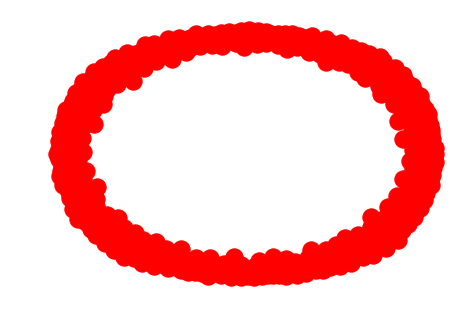

In [20]:
import matplotlib.pyplot as plt
nx.draw(g_dir)
plt.show()

//anaconda/envs/tens_correct/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
//anaconda/envs/tens_correct/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
//anaconda/envs/tens_correct/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/envs/tens_correct/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

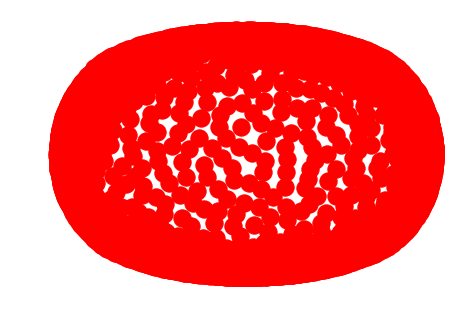

In [19]:
nx.draw(g_com)
plt.show()